Introduction to K-Nearest Neighbors (KNN) in Machine Learning

This code serves as an introductory example to implementing the K-Nearest Neighbors (KNN) algorithm using the Iris dataset without comprehensive data preprocessing, feature engineering, or advanced model evaluation techniques. KNN is a simple yet powerful algorithm used for both classification and regression tasks in machine learning.

In [28]:
# Import all the necessary libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [43]:
# Load the Iris dataset
iris = load_iris()

In [44]:
# Explore the dataset to see what features it contains
print("These are the features: \n{}".format(iris.feature_names))
print("Here is the description of the data: \n{}".format(iris.DESCR))

These are the features: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Here is the description of the data: 
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)


In [45]:
# Split the data into training and testing sets
# You don't want to test on the same data as it will always come back 100%
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

In [46]:
# Create a DataFrame from the training data to see what it looks like
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


In [47]:
# Display the first few rows of the DataFrame
iris_df.head()



In [48]:
# Add the target labels as a new column in the DataFrame
iris_df['class'] = y_train

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


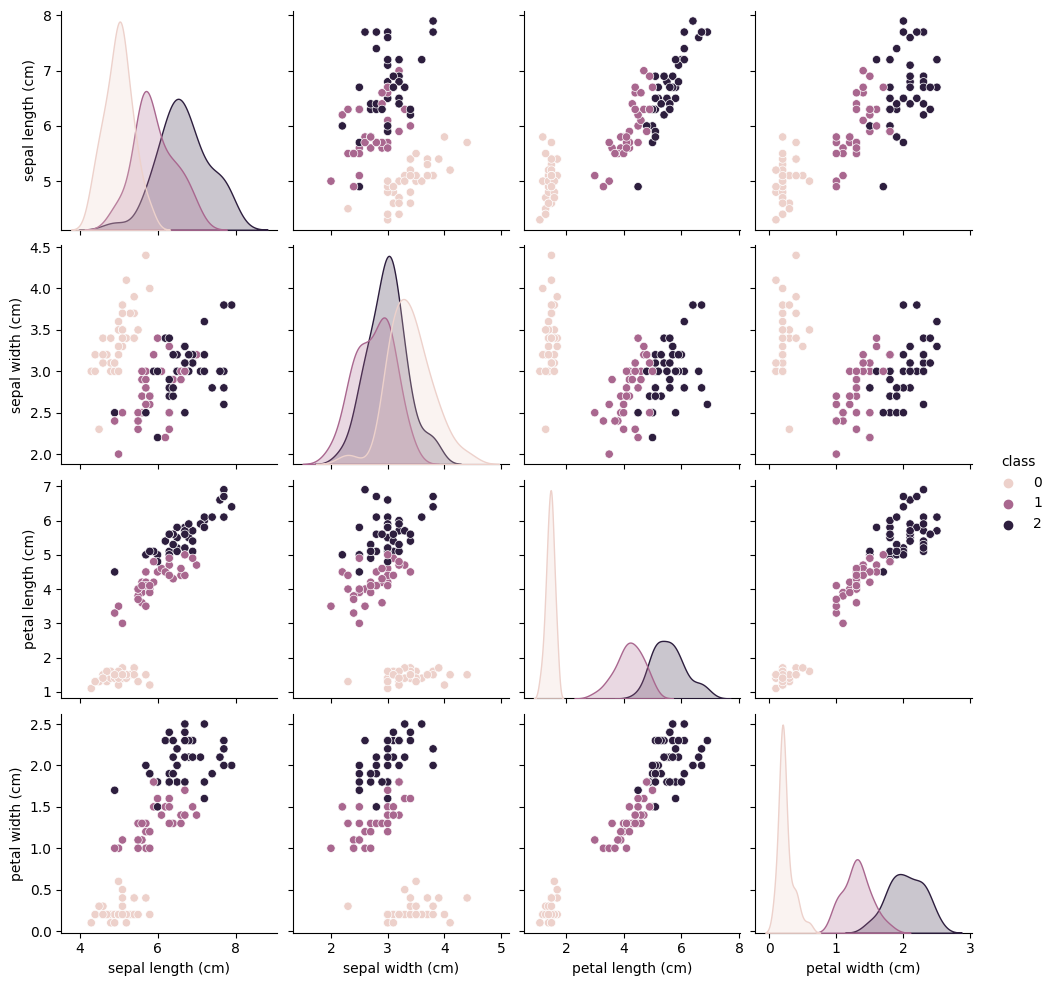

In [49]:
# Create a pairplot to visualize relationships between features, colored by class
sns.pairplot(data=iris_df, hue='class')
plt.show()

In [50]:
# Print the target data for reference
print("Target labels: {}".format(iris.target))


Target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [51]:
# Create a K-Nearest Neighbors classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [52]:
# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_prediction = knn.predict(X_test)

In [53]:
# Print the predictions and corresponding target names
print("Predictions: {}".format(y_prediction))
print("Predicted target names: {}".format(iris['target_names'][y_prediction]))


Predictions: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Predicted target names: ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']


In [54]:
# Print the test set predictions
print("Test set predictions:\n{}".format(y_prediction))

# Evaluate the accuracy of the model on the test set
test_accuracy = knn.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(test_accuracy))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set accuracy: 0.97
